In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Columns description
#### 1. url contains the url of the restaurant in the zomato website

#### 2. address contains the address of the restaurant in Bengaluru

#### 3. name contains the name of the restaurant

#### 4. online_order whether online ordering is available in the restaurant or not

#### 5. book_table table book option available or not

#### 6. rate contains the overall rating of the restaurant out of 5

#### 7. votes contains total number of rating for the restaurant as of the above mentioned date

#### 8. phone contains the phone number of the restaurant

#### 9. location contains the neighborhood in which the restaurant is located

#### 10. rest_type restaurant type

#### 11. dish_liked dishes people liked in the restaurant

#### 12. cuisines food styles, separated by comma

#### 13. approx_cost(for two people) contains the approximate cost for meal for two people

#### 14. reviews_list list of tuples containing reviews for the restaurant, each tuple

#### 15. menu_item contains list of menus available in the restaurant

#### 16. listed_in(type) type of meal

#### 17. listed_in(city) contains the neighborhood in which the restaurant is listed

## Read the Dataset

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
len(df['name'].unique())

8792

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Getting all NAN features

In [8]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
# % of missing values
for feature in feature_na:
    print('{} had {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate had 15.0337 missing values
phone had 2.3358 missing values
location had 0.0406 missing values
rest_type had 0.4389 missing values
dish_liked had 54.2916 missing values
cuisines had 0.087 missing values
approx_cost(for two people) had 0.669 missing values


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df.dropna(axis = 'index',subset = ['rate'],inplace = True)

In [12]:
df.shape

(43942, 17)

In [13]:
def split(x):
    return x.split('/')[0]

In [14]:
df['rate']=df['rate'].apply(split)

In [15]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [17]:
df.replace('NEW',0,inplace = True)

In [18]:
df.replace('-',0,inplace = True)

In [19]:
df['rate'].dtype

dtype('O')

In [20]:
df['rate'] = df['rate'].astype(float)

In [21]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [22]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Calculate avg rating of each resturant

In [23]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

restaurant    rating
0                           #FeelTheROLL  3.400000
1                             #L-81 Cafe  3.900000
2                                #refuel  3.700000
3                               1000 B.C  3.200000
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
5             11 to 11 Express Biriyanis  3.500000
6                     1131 Bar + Kitchen  4.500000
7              12th Main - Grand Mercure  4.100000
8                          1441 Pizzeria  4.100000
9                         1522 - The Pub  4.212000
10                    154 Breakfast Club  4.000000
11                     1722 Urban Bistro  4.100000
12                          18+ Ice Cafe  3.500000
13                                  1947  4.021429
14                      1980s Games Cafe  3.400000
15                    1992 Chats - Space  3.700000
16                                   1Q1  4.300000
17                          1TO3 Kitchen  3.100000
18                              2 Statez  3.700000
19         20 Char - Sterlings MAC Hotel  4.000000

In [24]:
df_rate.shape

(7162, 2)

## Rating distribution

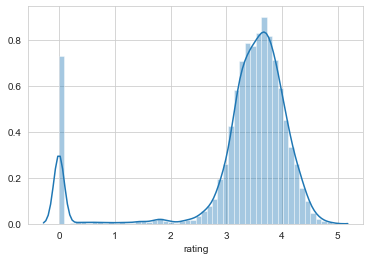

In [25]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

### Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.


## Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

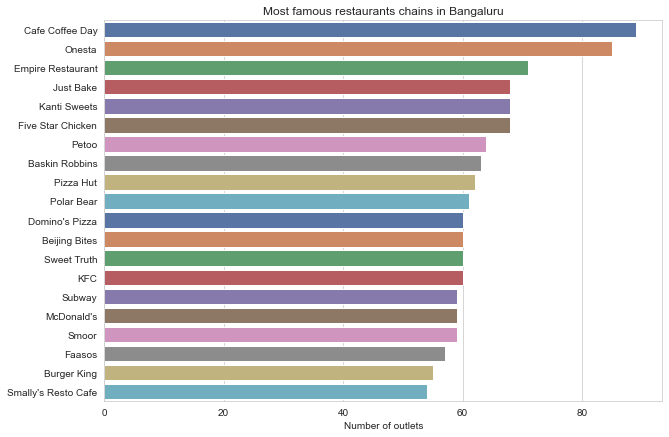

In [26]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

In [27]:
df['online_order'].value_counts()

Yes    28308
No     15634
Name: online_order, dtype: int64

### How many of the restuarants do not accept online orders?

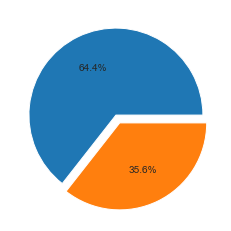

In [28]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

## Using plotly, How many of the restuarants do not accept online orders?

In [29]:
!pip install plotly

In [30]:
import plotly.express as px

In [31]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [32]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

### What is the ratio b/w restaurants that provide and do not provide table booking ?

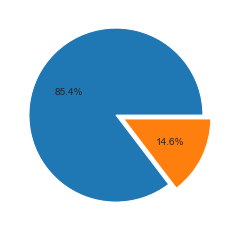

In [33]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')
plt.show()

## Using plotly, What is the ratio b/w restaurants that provide and do not provide table booking ?

In [34]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [35]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [36]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [37]:
iplot([trace])

### How many types of restaurants we have?

In [38]:
df['rest_type'].isna().sum()

151

In [39]:
df['rest_type'].dropna(inplace=True)

In [40]:
df['rest_type'].isna().sum()

0

In [41]:
len(df['rest_type'].unique())

87

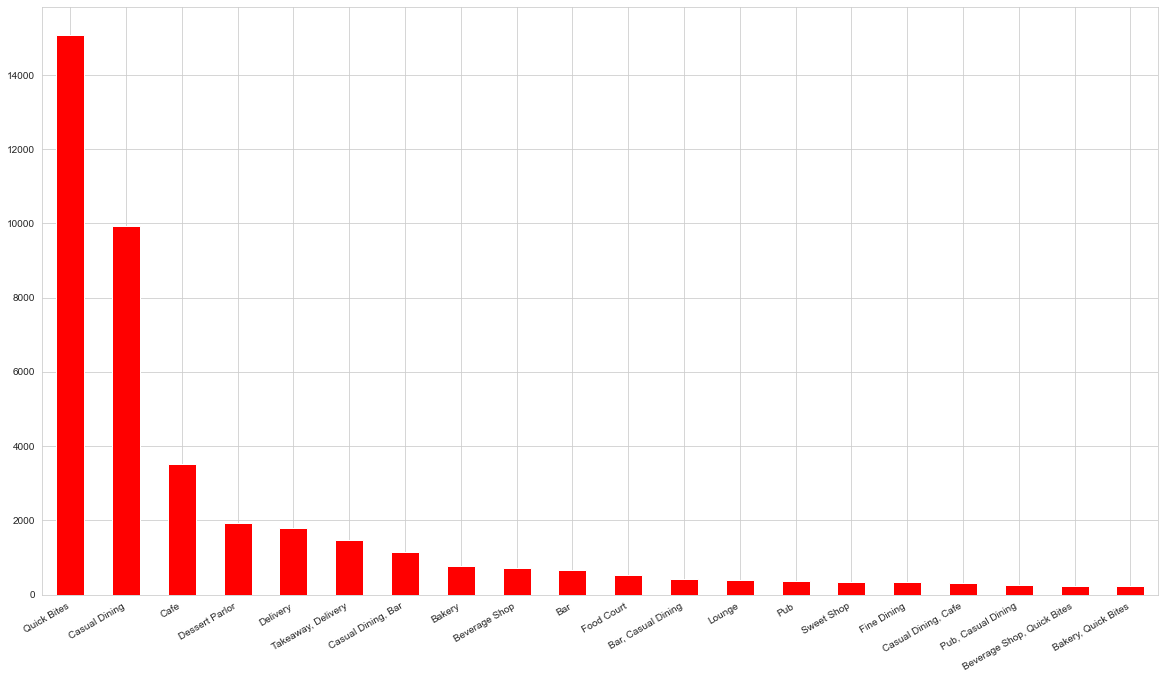

In [42]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()


### Now using plotly

In [43]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [44]:
iplot([trace1])

### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
### We can observe tha Quick Bites type restaurants dominates.

### Highest voted restaurant

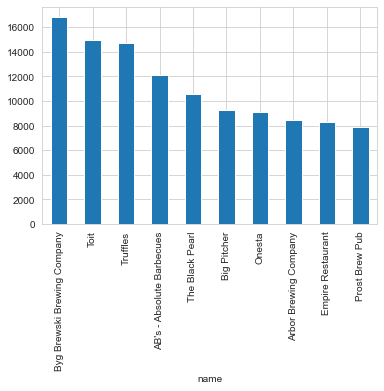

In [45]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

### Now using plotly to provide interactive graphs

In [46]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [47]:
iplot([trace1])

### Total restaurants at different locations of Bengalore

In [48]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [49]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [50]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

restaurant
location                     
Bellandur                 284
Jayanagar                 311
Bannerghatta Road         362
JP Nagar                  400
Indiranagar               467
Electronic City           518
Marathahalli              525
HSR                       553
BTM                       581
Whitefield                634

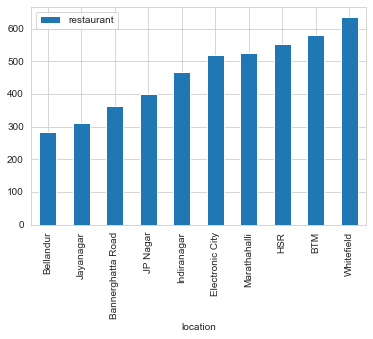

In [51]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [52]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [53]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [54]:
iplot([trace1])

In [55]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Different type of restaurants

In [56]:
#data is represented in form of percentage 
(df['rest_type'].value_counts()/len(df))*100

Quick Bites                  34.302035
Casual Dining                22.582040
Cafe                          8.026489
Dessert Parlor                4.412635
Delivery                      4.075827
                               ...    
Bakery, Food Court            0.004551
Bakery, Beverage Shop         0.004551
Dessert Parlor, Kiosk         0.004551
Food Court, Beverage Shop     0.004551
Quick Bites, Kiosk            0.002276
Name: rest_type, Length: 87, dtype: float64

### Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

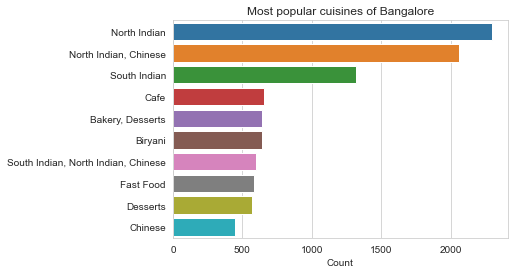

In [57]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [58]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')

In [59]:
iplot([trace1])

### Analyse Approx cost for 2 people

In [60]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [61]:
len(df['approx_cost(for two people)'].value_counts())

66

In [62]:
df['approx_cost(for two people)'].isna().sum()

252

In [63]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [64]:
df['approx_cost(for two people)'].isna().sum()

0

In [65]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [66]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [67]:
df[~df['approx_cost(for two people)'].apply(is_float)]

url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
119    https://www.zomato.com/bangalore/k27-the-pub-b...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
...                                                  ...   
51707  https://www.zomato.com/bangalore/m-bar-bengalu...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
67     10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
119    27, 27th Cross, 2nd Stage, Banashankari, Banga...   
166    805, Ground Floor, 35C Cross, 9th Main, 4th Bl...   
207    Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...   
217    359/38,Next to Fabindia, 7th Cross, 1st Block,...   
...                                                  ...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
67                                    Gustoes Beer House           No   
119                                        K27 - The Pub           No   
166                                            Patio 805          Yes   
207                                        Chutney Chang          Yes   
217                                              Toscano          Yes   
...                                                  ...          ...   
51707        M Bar - Bengaluru Marriott Hotel Whitefield           No   
51708                             Keys Cafe - Keys Hotel           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                           phone  \
67            No   4.1    868                    080 49653521   
119           No   3.1     30                  +91 9980097472   
166          Yes   4.1    364                  +91 8884999805   
207          Yes   4.1   2339  080 22443007\r\n+91 9901967373   
217          Yes   4.3   1129  080 41558423\r\n+91 7619320074   
...          ...   ...    ...                             ...   
51707         No   3.9     77                    080 49435000   
51708         No   2.8    161    080 39451000\n+91 8884038484   
51712         No   3.6     27                    080 40301477   
51715        Yes   4.3    236                    080 49652769   
51716         No   3.4     13                  +91 8071117272   

                         location           rest_type  \
67                   Banashankari                 Pub   
119                  Banashankari                 Bar   
166                     Jayanagar       Casual Dining   
207                     Jayanagar       Casual Dining   
217                     Jayanagar       Casual Dining   
...                           ...                 ...   
51707                  Whitefield    Fine Dining, Bar   
51708                  Whitefield  Casual Dining, Bar   
51712                  Whitefield                 Bar   
51715  ITPL Main Road, Whitefield                 Bar   
51716  ITPL Main Road, Whitefield  Bar, Casual Dining   

                                              dish_liked  \
67     Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
119                                                  NaN   
166    Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...   
207    Veg Momos, Brownie Ch

In [68]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [69]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [70]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [71]:
type(df['approx_cost(for two people)'][0])

str

## Removing ,

In [72]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [73]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

## Cost vs Rating

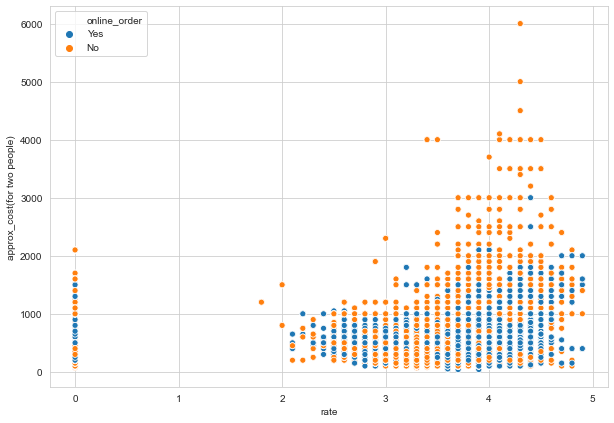

In [74]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

### From this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too
​

In [75]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

### Is there any difference b/w votes of restaurants accepting and not accepting online orders?


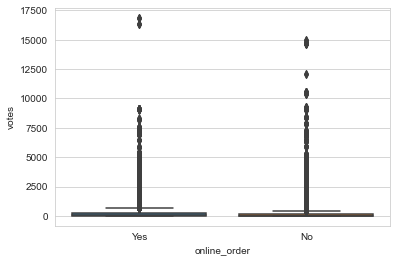

In [76]:
sns.boxplot(x='online_order',y='votes',data=df)

### From this boxplot,we can observe that median number of votes for both categories vary.
### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

#### Is there any difference b/w price of restaurants accepting and not accepting online orders?

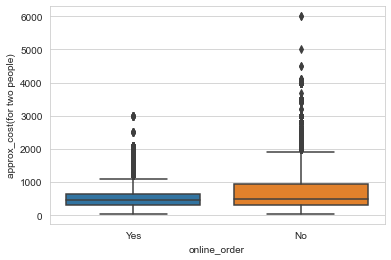

In [77]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [78]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

### Cheapest Rate for 2 people


In [79]:
df['approx_cost(for two people)'].min()

40

In [80]:
df['approx_cost(for two people)'].max()

6000

In [81]:
df[df['approx_cost(for two people)']==6000]

url  \
19139  https://www.zomato.com/bangalore/le-cirque-sig...   
45618  https://www.zomato.com/bangalore/le-cirque-sig...   

                                                 address  \
19139  The Leela Palace, 23, Old Airport Road, Bangalore   
45618  The Leela Palace, 23, Old Airport Road, Bangalore   

                                         name online_order book_table  rate  \
19139  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
45618  Le Cirque Signature - The Leela Palace           No        Yes   4.3   

       votes                         phone          location    rest_type  \
19139    126  080 30571234\r\n080 30571540  Old Airport Road  Fine Dining   
45618    128    080 30571234\n080 30571540  Old Airport Road  Fine Dining   

                                              dish_liked         cuisines  \
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   

       approx_cost(for two people)  \
19139                         6000   
45618                         6000   

                                            reviews_list menu_item  \
19139  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   
45618  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   

      listed_in(type)   listed_in(city)  
19139        Dine-out       Indiranagar  
45618        Dine-out  Old Airport Road

In [82]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

### Distribution of cost for 2 people

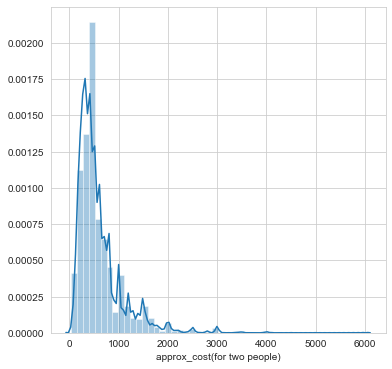

In [83]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [84]:
px.histogram(df, x="approx_cost(for two people)")

### Most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

### Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [85]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [86]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [87]:
data=df.copy()

In [88]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [89]:
data.set_index('name',inplace=True)

### Top 10 Most Expensive restaurant with approx cost for 2 people

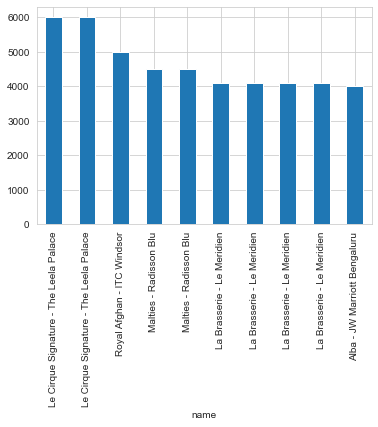

In [90]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

In [91]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nlargest(10).index,
        y = data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

### Top 10 Cheapest restaurant with approx cost for 2 people

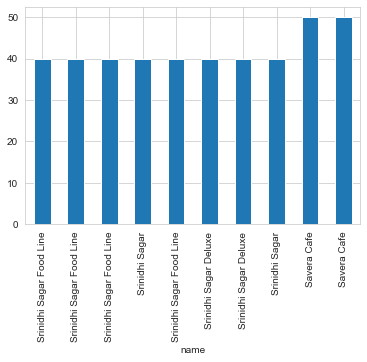

In [92]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [93]:
trace1 = go.Bar( 
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

### Top 10 Cheapest restaurant location wise with approx cost for 2 people

In [94]:
data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nsmallest(10)

location
Indiranagar         40
Indiranagar         40
Indiranagar         40
Old Airport Road    40
Indiranagar         40
Domlur              40
Domlur              40
Old Airport Road    40
Shivajinagar        50
Shivajinagar        50
Name: approx_cost(for two people), dtype: int32

In [95]:
data[data['approx_cost(for two people)']<=500]

url  \
location                                                          
Banashankari  https://www.zomato.com/bangalore/addhuri-udupi...   
Banashankari  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
Banashankari  https://www.zomato.com/bangalore/the-coffee-sh...   
Banashankari  https://www.zomato.com/bangalore/caf-eleven-ba...   
Banashankari  https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                         ...   
Brookefield   https://www.zomato.com/bangalore/venice-kerala...   
KR Puram      https://www.zomato.com/bangalore/thai-chinese-...   
Brookefield   https://www.zomato.com/bangalore/the-crunch-br...   
KR Puram      https://www.zomato.com/bangalore/punjabi-charc...   
Brookefield   https://www.zomato.com/bangalore/raapchick-bro...   

                                                        address online_order  \
location                                                                       
Banashankari  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No   
Banashankari  12,29 Near PES University Back Gate, D'Souza N...          Yes   
Banashankari      6th Block, 3rd Stage, Banashankari, Bangalore          Yes   
Banashankari  111, Sapphire Toys Building, 100 Feet Ring Roa...           No   
Banashankari  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...           No   
...                                                         ...          ...   
Brookefield   Opposite Brookfield Mall, Shiva Temple Road, B...           No   
KR Puram      7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...           No   
Brookefield     33/1, Kundalahalli Road, Brookefield, Bangalore           No   
KR Puram      7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...           No   
Brookefield   Opposite Brookefield Mall, Kundanhalli, Brooke...          Yes   

             book_table  rate  votes                           phone  \
location                                                               
Banashankari         No   3.7     88                  +91 9620009302   
Banashankari         No   4.1    402  080 26724489\r\n+91 7406048982   
Banashankari        Yes   4.2    164                  +91 9731644212   
Banashankari         No   4.0    424                    080 49577715   
Banashankari         No   3.9     93                  +91 8884726600   
...                 ...   ...    ...                             ...   
Brookefield          No   3.7     34                  +91 8880059495   
KR Puram             No   3.4      7  +91 9206260085\n+91 7619416923   
Brookefield          No   3.3      6                  +91 9016277963   
KR Puram             No   3.6     31  +91 9341341916\n+91 7619416499   
Brookefield          No   3.6     49    080 41717785\n+91 9571153004   

                  rest_type  \
location                      
Banashankari    Quick Bites   
Banashankari           Cafe   
Banashankari           Cafe   
Banashankari           Cafe   
Banashankari           Cafe   
...                     ...   
Brookefield     Quick Bites   
KR Puram        Quick Bites   
Brookefield   Beverage Shop   
KR Puram        Quick Bites   
Brookefield     Quick Bites   

                                                     dish_liked  \
location                                                          
Banashankari                                        Masala Dosa   
Banashankari  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
Banashankari  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
Banashankari  Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
Banashankari     Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   
...                                                         ...   
Brookefield                                                 NaN   
KR Puram                                                    NaN   
Brookefield                                                 NaN   
KR Puram                                                    NaN   
Br

In [96]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

location  approx_cost(for two people)
0  Banashankari                          300
1  Banashankari                          500
2  Banashankari                          500
3  Banashankari                          450
4  Banashankari                          300

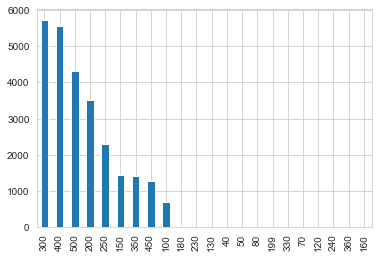

In [97]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

In [98]:
trace1 = go.Bar( 
        x = df_budget['approx_cost(for two people)'].value_counts().index,
        y = df_budget['approx_cost(for two people)'].value_counts(),
        name= 'Priority')
iplot([trace1])

### Restaurants that have better rating >4 and that are under budget too

In [99]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape


(4007, 17)

In [100]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

### Total such various affordable hotels at different location

In [101]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [102]:
len(location)

68

In [103]:
len(total)

68

In [104]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [105]:
location_df.head(20)

restaurant
location                      
BTM                         54
Banashankari                25
Banaswadi                    3
Bannerghatta Road           19
Basavanagudi                31
Basaveshwara Nagar           3
Bellandur                   20
Brigade Road                11
Brookefield                 16
Church Street                8
City Market                  1
Commercial Street            4
Cunningham Road              4
Domlur                       5
Ejipura                      1
Electronic City             23
Frazer Town                 15
HBR Layout                   3
HSR                         58
Hebbal                       1

In [106]:
type(location)

list

Text(0, 0.5, 'Total restaurants')

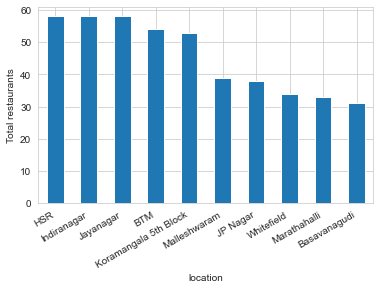

In [107]:

location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

In [108]:
trace1 = go.Bar( 
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])

## To Visualise what are the names of those hotels

In [109]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())

In [110]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi          [Pooja Dosa Camp, Corner House Ice Cream, The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...

## Finding Best budget Restaurants in any location
#### we will pass location and restaurant type as parameteres,function will return name of restaurants.

In [111]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [112]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Which are the foodie areas?

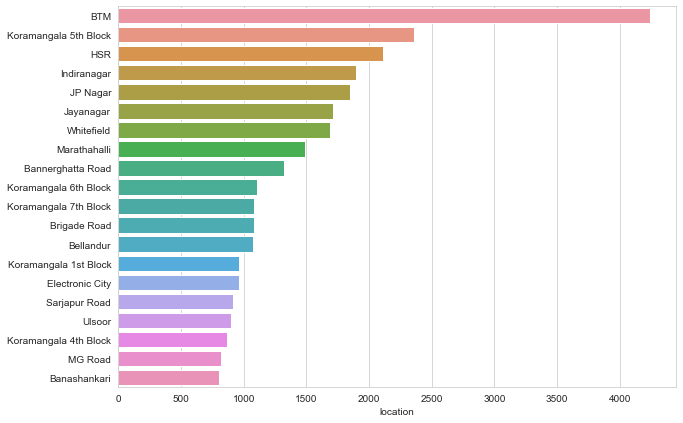

In [116]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

### Geographical analysis
#### I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [119]:
df.shape

(43690, 17)

In [120]:
len(df['location'].unique())

92

In [121]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [122]:
locations['new_Name']='Bangalore '+locations['Name']

In [123]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [124]:
!pip install geopy

In [125]:
from geopy.geocoders import Nominatim

In [126]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [127]:
locations['geo_loc']=lat_lon

In [128]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.3872141, 76.6669626)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [129]:
locations.to_csv('zomato_locations.csv',index=False)

In [130]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [131]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [132]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.3872141, 76.6669626)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [133]:
locations.shape

(92, 3)

In [134]:
Rest_locations.shape

(92, 2)

In [135]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (13.2923988, 77.7519261)  
2                (18.1475, 41.538889)  
3            (12.9732913, 77.6404672)  
4            (12.2655944, 76.6465404)

In [136]:
Restaurant_locations.shape

(91, 4)

In [137]:
Restaurant_locations['count'].max()

4237

In [138]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [139]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [140]:
len(Restaurant_locations['geo_loc'])

91

In [141]:
Restaurant_locations.isna().sum()

Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [142]:
Restaurant_locations['geo_loc'][0][0]

45.95485055

In [143]:
Restaurant_locations['geo_loc'][0][1]

-112.49659530324134

In [144]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (13.2923988, 77.7519261),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.887979, 77.5970812), (13.2923988, 77.7519261),
       (13.2923988, 77.7519261), (40.28745, -76.964526),
       (12.93577245, 77.66676103753434), (12.9355425, 77.6128717),
       (-8.6368007, 115.2147012), (12.9242381, 77.6289059),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (50.7721586, 0.09772783661369303),
       (38.7385916, -77.5275749), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (51.373656, -0.1042366),
       (13.0093455, 77.6377094), (13.0346384, 77.5681733),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.988233

In [145]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [146]:
type(lat)

tuple

In [147]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [148]:
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                              geo_loc        lat         lon  
0  (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1            (13.2923988, 77.7519261)  13.292399   77.751926  
2                (18.1475, 41.538889)  18.147500   41.538889  
3            (12.9732913, 77.6404672)  12.973291   77.640467  
4            (12.2655944, 76.6465404)  12.265594   76.646540

In [149]:
!pip install folium

In [150]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [151]:
basemap

In [152]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [13.2923988, 77.7519261, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [44.3730577, -71.6118577, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.887979, 77.5970812, 1318.0],
 [13.2923988, 77.7519261, 1103.0],
 [13.2923988, 77.7519261, 1084.0],
 [40.28745, -76.964526, 1084.0],
 [12.93577245, 77.66676103753434, 1078.0],
 [12.9355425, 77.6128717, 964.0],
 [-8.6368007, 115.2147012, 963.0],
 [12.9242381, 77.6289059, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [29.4534927, -98.6440138, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [50.7721586, 0.09772783661369303, 626.0],
 [38.7385916, -77.5275749, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [51.373656, -0.1042366, 550.

In [153]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [154]:
basemap

### It is clear that restaurants tend to concentrate in central bangalore area.
### The clutter of restaurants lowers are we move away from central.
### So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
### note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

### Heatmap of North Indian restaurants

In [155]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [156]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [157]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [158]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [159]:
north_india.head()

Name  count                     new_Name  \
0                BTM    262                Bangalore BTM   
1       Banashankari     35       Bangalore Banashankari   
2          Banaswadi      9          Bangalore Banaswadi   
3  Bannerghatta Road     60  Bangalore Bannerghatta Road   
4       Basavanagudi     17       Bangalore Basavanagudi   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (15.8876779, 75.7046777)  
2            (13.0141618, 77.6518539)  
3             (12.887979, 77.5970812)  
4            (12.9417261, 77.5755021)

In [160]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [161]:
north_india.drop(['geo_loc'],axis=1)

Name  count  \
0                             BTM    262   
1                    Banashankari     35   
2                       Banaswadi      9   
3               Bannerghatta Road     60   
4                    Basavanagudi     17   
..                            ...    ...   
58  Varthur Main Road, Whitefield      3   
59                  Vasanth Nagar     12   
60                     Whitefield    146   
61                  Wilson Garden     37   
62                    Yeshwantpur      3   

                                   new_Name        lan         lon  
0                             Bangalore BTM  45.954851 -112.496595  
1                    Bangalore Banashankari  15.887678   75.704678  
2                       Bangalore Banaswadi  13.014162   77.651854  
3               Bangalore Bannerghatta Road  12.887979   77.597081  
4                    Bangalore Basavanagudi  12.941726   77.575502  
..                                      ...        ...         ...  
58  Bangalore Varthur Main Road, Whitefield  12.941466   77.747094  
59                  Bangalore Vasanth Nagar  12.988721   77.585169  
60                     Bangalore Whitefield  44.373058  -71.611858  
61                  Bangalore Wilson Garden  12.948934   77.596827  
62                    Bangalore Yeshwantpur  13.023830   77.552921  

[63 rows x 5 columns]

In [162]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

### Create wordcloud for each and every restaurant

In [163]:
from wordcloud import WordCloud, STOPWORDS 

In [164]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [165]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)

In [167]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [168]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

### Wordcloud for 1 restaurant

In [169]:
data=df[df['rest_type']=='Quick Bites']

In [170]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

In [171]:
stopwords=set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

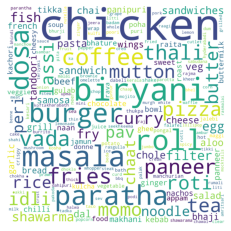

In [172]:
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")